# Mount Drive

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Installation

In [19]:
# !pip install scikit_optimize
# !pip install lightgbm
# !pip install auto-sklearn 


use kaleido to show plotly as image

In [20]:
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

# Imports

In [21]:
import numpy as np 
import pandas as pd 
import os
from os import listdir, getcwd, system
import datetime
import time
import timeit
from math import sqrt 
import pickle
import gc
import json

import joblib
# skopt.space.space

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# from jupyter_dash import JupyterDash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# from Dash_converter import checkpoint, experiment

# preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFwe, f_regression, SelectKBest, SelectFdr, chi2, f_classif, mutual_info_classif, SelectFromModel
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer, PolynomialFeatures
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# # text mining
# import nltk
# nltk.download('all-corpora', 'punkt', 'stopwords') # NLP - Download 'all-corpora' and 'punkt' from nltk
# from nltk.tokenize import sent_tokenize, word_tokenize, punkt
# from nltk.corpus import stopwords
# from nltk.stem.snowball import SnowballStemmer
# import re, string
# from sklearn.feature_extraction.text import TfidfVectorizer

# decomposition
from sklearn.decomposition import PCA

# Models
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model
from sklearn import svm

from sklearn.preprocessing import StandardScaler  #minmaxscaler (image data - here not known) #maxscaler
from sklearn.linear_model import MultiTaskLasso, PassiveAggressiveClassifier, LogisticRegression, SGDClassifier, Perceptron, LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor# https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy.html
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import clone
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import multilabel_confusion_matrix, mean_squared_error, classification_report, explained_variance_score, r2_score, median_absolute_error, mean_absolute_error, mean_squared_error, make_scorer, accuracy_score, confusion_matrix, average_precision_score, f1_score, precision_score, recall_score 


# from lightgbm import LGBMRegressor
# from xgboost.sklearn import XGBRegressor
# from catboost import CatBoostRegressor

# import lightgbm as lgb
# import xgboost as xgb
# import catboost as ctb


# deeplearning
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications import InceptionResNetV2, Xception, MobileNetV2, NASNetMobile, InceptionV3, EfficientNetV2S, EfficientNetV2M, EfficientNetV2L
from tensorflow import keras

from keras import optimizers
from keras.models import Model, Sequential, load_model
from keras.applications import vgg16



from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, Input, GlobalAveragePooling2D, BatchNormalization
from keras.layers import LSTM
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss



# image
from PIL import Image
import PIL
import matplotlib.image as mpimgC
from PIL import Image
import PIL
from skimage.io import imread, imshow
from skimage import io
import cv2 as cv
import kaleido

# Hyperparameter tuning
# from functools import partial
# from skopt.searchcv import BayesSearchCV
# from skopt import space 
# from skopt.space import Integer, Real, Categorical 
# from skopt.utils import use_named_args
# from skopt import gp_minimize
# import autosklearn.regression
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK, STATUS_FAIL

#dropdown
import ipywidgets as widgets
import IPython
from IPython.display import Image
from IPython.core.display import display, HTML
from ipywidgets import interact, interactive, fixed, interact_manual



# To see multiple outputs from a cell
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 20) 

# Setup
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (20,5)


In [22]:
def save_obj(obj, path, name):
    with open(path +"/"+name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(path, name):
    with open(path +"/"+ name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [23]:
def showPlotlyAsImage(fig, width=1200, height=300):
  img_bytes = fig.to_image(format="png", width=width, height=height, scale=2)
  display(Image(img_bytes))

In [24]:
gc.collect()
tf.keras.backend.clear_session()

In [25]:
seed=42
tf.random.set_seed(seed)
np.random.seed(seed)

In [26]:
os.listdir()

['.config', '=4.0.0', 'drive', 'sample_data']

## check runtime (gpu)

In [27]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [28]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [29]:
tf.config.list_physical_devices('GPU')

[]

In [30]:
# tf.test.is_gpu_available()

In [31]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10134875254083214728
xla_global_id: -1
]


### Variables


In [32]:
# #@title String fields (change this to train the model with all the data and to save it)

# PExperimentName = 'MobileNetV2_v1_submission' #@param {type:"string"}
# PFULL_RUN = False #@param ["False", "True"] {type:"raw"}
# PSAVE_Model = False #@param ["False", "True"] {type:"raw"}

In [33]:
folder_OR2 = 'drive/MyDrive/Industrial_Applications_of_AI/Secondary_Sector/Online_Retail_II'
folder_OR2_data = 'drive/MyDrive/Industrial_Applications_of_AI/Secondary_Sector/Online_Retail_II/data'
folder_OR2_models = 'drive/MyDrive/Industrial_Applications_of_AI/Secondary_Sector/Online_Retail_II/models'

# Load the training dataset 

In [34]:
df = pd.read_csv(os.path.join(folder_OR2_data,'df_train.csv'))
df = df.drop(['Unnamed: 0'], axis = 1)
df

InvoiceDate  Sum_OrderQuantity  Sum_ReturnBoolean  \
0     2009-12-02 12:00:00               6859                  6   
1     2009-12-02 14:00:00               3323                  2   
2     2009-12-02 16:00:00               6062                  0   
3     2009-12-02 18:00:00                  0                  0   
4     2009-12-02 20:00:00                  0                  0   
...                   ...                ...                ...   
4014  2010-11-02 00:00:00                  0                  0   
4015  2010-11-02 02:00:00                  0                  0   
4016  2010-11-02 04:00:00                  0                  0   
4017  2010-11-02 06:00:00                  0                  0   
4018  2010-11-02 08:00:00               1048                  3   

      Sum_CustomerAmount  Sum_Country_Australia  Sum_Country_Austria  \
0                    864                    0.0                  0.0   
1                    553                    0.0                  0.0   
2                    185                    0.0                  0.0   
3                      0                    0.0                  0.0   
4                      0                    0.0                  0.0   
...                  ...                    ...                  ...   
4014                   0                    0.0                  0.0   
4015                   0                    0.0                  0.0   
4016                   0                    0.0                  0.0   
4017                   0                    0.0                  0.0   
4018                 112                    0.0                  0.0   

      Sum_Country_Bahrain  Sum_Country_Belgium  Sum_Country_Brazil  \
0                     0.0                  0.0                 0.0   
1                     0.0                  0.0                 0.0   
2                     0.0                  0.0                 0.0   
3                     0.0                  0.0                 0.0   
4                     0.0                  0.0                 0.0   
...                   ...                  ...                 ...   
4014                  0.0                  0.0                 0.0   
4015                  0.0                  0.0                 0.0   
4016                  0.0                  0.0                 0.0   
4017                  0.0                  0.0                 0.0   
4018                  0.0                  0.0                 0.0   

      Sum_Country_Canada  ...  lag12_Sum_OrderQuantity  \
0                    0.0  ...                   9586.0   
1                    0.0  ...                   2656.0   
2                    0.0  ...                   2609.0   
3                    0.0  ...                    797.0   
4                    0.0  ...                      0.0   
...                  ...  ...                      ...   
4014                 0.0  ...                      0.0   
4015                 0.0  ...                      0.0   
4016                 0.0  ...                      0.0   
4017                 0.0  ...                      0.0   
4018                 0.0  ...                    639.0   

      lag12_Sum_ReturnBoolean  lag12_Sum_CustomerAmount  \
0                        41.0                     994.0   
1                        28.0                     326.0   
2                         6.0                     227.0   
3                         0.0                      54.0   
4                         0.0                       0.0   
...                       ...                       ...   
4014                      0.0                       0.0   
4015                      0.0                       0.0   
4016                      0.0                       0.0   
4017                      0.0                       0.0   
4018                      3.0                      52.0   

      lag13_Sum_OrderQuantity  lag13_Sum_ReturnBoolean  \
0                      5756.0          

In [35]:
df.describe().transpose().applymap("{:.2f}".format)

count     mean      std        min   25%   50%  \
Sum_OrderQuantity         4019.00  1124.12  3947.57  -81258.00  0.00  0.00   
Sum_ReturnBoolean         4019.00     2.06     6.49       0.00  0.00  0.00   
Sum_CustomerAmount        4019.00    84.54   155.50       0.00  0.00  0.00   
Sum_Country_Australia     4019.00     0.11     1.87       0.00  0.00  0.00   
Sum_Country_Austria       4019.00     0.10     1.96       0.00  0.00  0.00   
...                           ...      ...      ...        ...   ...   ...   
lag13_Sum_CustomerAmount  4019.00    84.87   156.31       0.00  0.00  0.00   
lag14_Sum_OrderQuantity   4019.00  1130.10  3952.17  -81258.00  0.00  0.00   
lag14_Sum_ReturnBoolean   4019.00     2.08     6.52       0.00  0.00  0.00   
lag14_Sum_CustomerAmount  4019.00    84.90   156.31       0.00  0.00  0.00   
target_OrderQuantity      4019.00  1123.02  3946.59  -81258.00  0.00  0.00   

                              75%        max  
Sum_OrderQuantity         1257.50  100015.00  
Sum_ReturnBoolean            0.00      80.00  
Sum_CustomerAmount         121.00    1141.00  
Sum_Country_Australia        0.00      87.00  
Sum_Country_Austria          0.00      75.00  
...                           ...        ...  
lag13_Sum_CustomerAmount   121.00    1141.00  
lag14_Sum_OrderQuantity   1274.50  100015.00  
lag14_Sum_ReturnBoolean      0.00      80.00  
lag14_Sum_CustomerAmount   121.00    1141.00  
target_OrderQuantity      1257.50  100015.00  

[86 rows x 8 columns]

In [36]:
show_rows = list(range(20, 30))
show_rows.extend(list(range(70, 80)))
df.iloc[show_rows, :]

InvoiceDate  Sum_OrderQuantity  Sum_ReturnBoolean  \
20  2009-12-04 04:00:00                  0                  0   
21  2009-12-04 06:00:00                  0                  0   
22  2009-12-04 08:00:00               3380                  1   
23  2009-12-04 10:00:00               3078                  4   
24  2009-12-04 12:00:00               5957                  9   
25  2009-12-04 14:00:00               6260                  3   
26  2009-12-04 16:00:00               1289                  9   
27  2009-12-04 18:00:00                  0                  0   
28  2009-12-04 20:00:00                  0                  0   
29  2009-12-04 22:00:00                  0                  0   
70  2009-12-08 08:00:00               1055                  2   
71  2009-12-08 10:00:00               2553                 22   
72  2009-12-08 12:00:00               7463                 56   
73  2009-12-08 14:00:00               3189                 77   
74  2009-12-08 16:00:00               2317                 59   
75  2009-12-08 18:00:00               1071                 28   
76  2009-12-08 20:00:00                  0                  0   
77  2009-12-08 22:00:00                  0                  0   
78  2009-12-09 00:00:00                  0                  0   
79  2009-12-09 02:00:00                  0                  0   

    Sum_CustomerAmount  Sum_Country_Australia  Sum_Country_Austria  \
20                   0                    0.0                  0.0   
21                   0                    0.0                  0.0   
22                 188                    0.0                  0.0   
23                 282                    0.0                  0.0   
24                 671                    0.0                  0.0   
25                 672                    0.0                  0.0   
26                 152                    0.0                  0.0   
27                   0                    0.0                  0.0   
28                   0                    0.0                  0.0   
29                   0                    0.0                  0.0   
70                  98                    2.0                  0.0   
71                 154                    0.0                  0.0   
72                 748                    0.0                  0.0   
73                 424                    0.0                  0.0   
74                 408                    0.0                  0.0   
75                 118                    0.0                  0.0   
76                   0                    0.0                  0.0   
77                   0                    0.0                  0.0   
78                   0                    0.0                  0.0   
79                   0                    0.0                  0.0   

    Sum_Country_Bahrain  Sum_Country_Belgium  Sum_Country_Brazil  \
20                  0.0                  0.0                 0.0   
21                  0.0                  0.0                 0.0   
22                  0.0                  0.0                 0.0   
23                  0.0                  0.0                 0.0   
24                  0.0                  0.0                 0.0   
25                  0.0                  0.0                 0.0   
26                  0.0                  0.0                 0.0   
27                  0.0                  0.0                 0.0   
28                  0.0                  0.0                 0.0   
29                  0.0                  0.0                 0.0   
70                  0.0                  0.0                 0.0   
71                  0.0                  0.0                 0.0   
72                  0.0                  0.0                 0.0   
73                  0.0                  0.0                 0.0   
74                  0.0                  0.0                 0.0   
75                  0.0                  0.0                 0.0   
76                 

In [37]:
target_series = df['target_OrderQuantity']

# Tests

## Target variable

In [38]:
px.line(df, x="InvoiceDate", y="target_OrderQuantity")


### Distribution

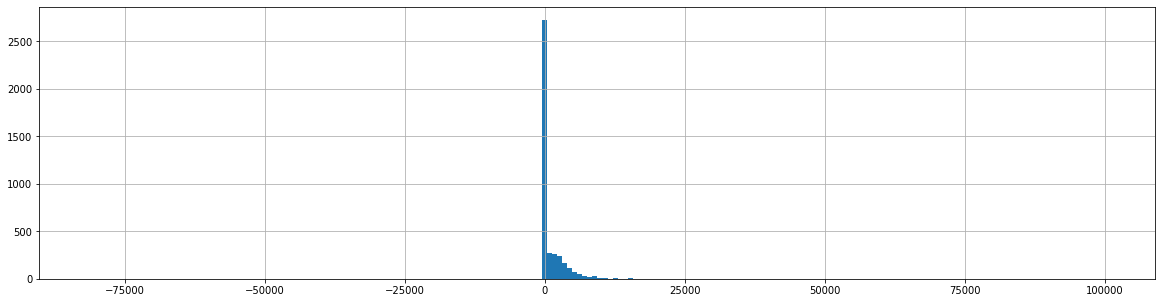

In [39]:
plt.rcParams["figure.figsize"] = (20,5)
target_series.hist(bins = 200)
plt.show()
plt.close()

## Test for Stationarity


### Augmented Dickey-Fuller test

https://machinelearningmastery.com/time-series-data-stationary-python/

In [40]:
result = adfuller(target_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.283141
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


p-value: 0.000000 \\
0.000000 <= 0.05

-> Reject the null hypothesis (H0), the data does not have a unit root and is therefore stationary.


### Kpss test

https://www.machinelearningplus.com/time-series/kpss-test-for-stationarity/

In [41]:
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(target_series)


KPSS Statistic: 0.3257567176158876
p-value: 0.1
num lags: 31
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


p-value: 0.1 \\
0.1 <= 0.05

-> Reject the null hypothesis (H0), the data and is not stationary.


## time series data trend seasonality

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

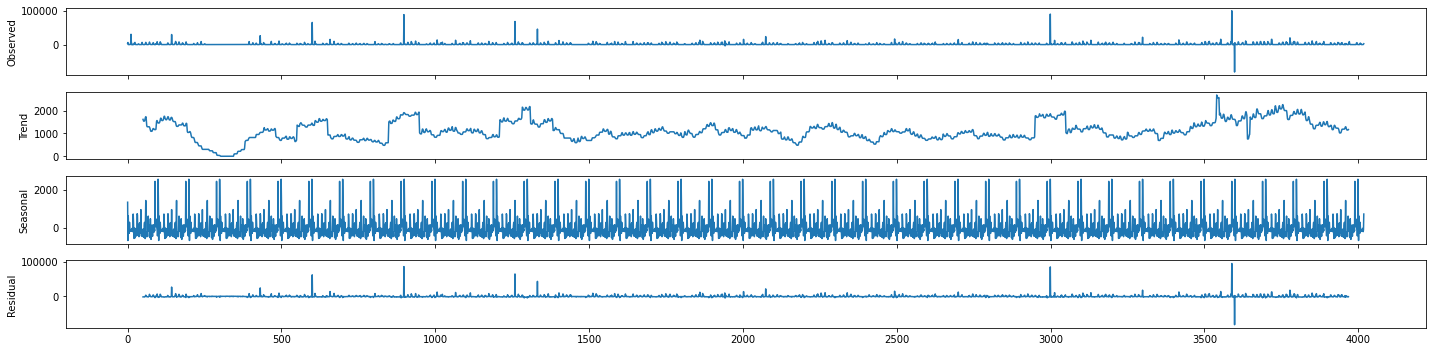

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(target_series, model='additive', freq=100)
result.plot()
plt.show()

## ACF and PACF

https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

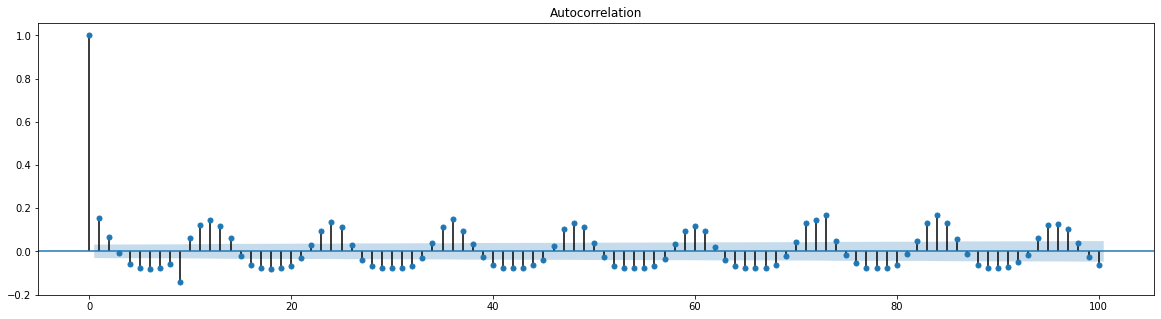

In [43]:
plot_acf(target_series, lags = 100)
plt.show()

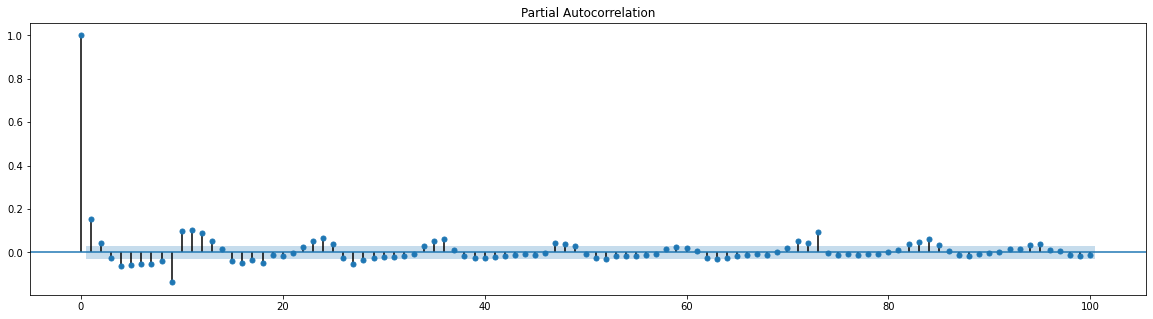

In [44]:
plot_pacf(target_series, lags=100)
plt.show()

In [45]:
for column in df.columns:
  if column not in ['InvoiceDate','target_OrderQuantity']:
    series = df[str(column)]
    plot_acf(series, lags = 100)
    plt.title('Autocorrelation: '+ str(column))
    plt.show()
    plt.close()

    plot_pacf(series, lags = 100)
    plt.title('Partial Autocorrelation: '+ str(column))
    plt.show()
    plt.close()

Output hidden; open in https://colab.research.google.com to view.

### Cross Correlation Plots

https://www.geeksforgeeks.org/matplotlib-pyplot-xcorr-in-python/

https://www.statology.org/cross-correlation-in-python/

In [46]:
column = 'target_OrderQuantity'
series = df[str(column)]
results_ccf =  sm.tsa.stattools.ccf(target_series, series)


In [47]:
px.bar(results_ccf[len(df)-100:], title = 'Cross correlation plot Feature: '+column )

In [48]:
for column in df.columns:
  if column not in ['InvoiceDate','target_OrderQuantity']:
    series = df[str(column)]
    results_ccf =  sm.tsa.stattools.ccf(target_series, series)

    fig = None
    fig = px.bar(results_ccf[len(df)-100:], title = 'Cross correlation plot Feature '+column )

    showPlotlyAsImage(fig)

Output hidden; open in https://colab.research.google.com to view.

## Correlation Matrix

In [49]:
for column in df.columns:
  print(column)

InvoiceDate
Sum_OrderQuantity
Sum_ReturnBoolean
Sum_CustomerAmount
Sum_Country_Australia
Sum_Country_Austria
Sum_Country_Bahrain
Sum_Country_Belgium
Sum_Country_Brazil
Sum_Country_Canada
Sum_Country_Channel Islands
Sum_Country_Cyprus
Sum_Country_Denmark
Sum_Country_EIRE
Sum_Country_Finland
Sum_Country_France
Sum_Country_Germany
Sum_Country_Greece
Sum_Country_Iceland
Sum_Country_Israel
Sum_Country_Italy
Sum_Country_Japan
Sum_Country_Korea
Sum_Country_Lithuania
Sum_Country_Malta
Sum_Country_Netherlands
Sum_Country_Nigeria
Sum_Country_Norway
Sum_Country_Poland
Sum_Country_Portugal
Sum_Country_RSA
Sum_Country_Singapore
Sum_Country_Spain
Sum_Country_Sweden
Sum_Country_Switzerland
Sum_Country_Thailand
Sum_Country_USA
Sum_Country_United Arab Emirates
Sum_Country_United Kingdom
Sum_Country_Unspecified
Sum_Country_West Indies
InvoiceDate_weekday_Num
InvoiceDate_week_Num
InvoiceDate_month_Num
InvoiceDate_weekend_Bool
InvoiceDate_holiday
lag1_Sum_OrderQuantity
lag1_Sum_ReturnBoolean
lag1_Sum_Cust

In [50]:
correlation_column_grouping = [
                               
  ['target_OrderQuantity',
   'Sum_OrderQuantity',
  'Sum_ReturnBoolean',
  'Sum_CustomerAmount',
  ],
  # [
  #  'Sum_OrderQuantity',
  # 'Mean_OrderQuantity',
  # 'Mean_ReturnBoolean',
  # ],
  ['target_OrderQuantity',
  'InvoiceDate_weekday_Num',
  'InvoiceDate_week_Num',
  'InvoiceDate_month_Num',
  'InvoiceDate_weekend_Bool',
  'InvoiceDate_holiday',
  ],
  [
  'target_OrderQuantity',
  'Sum_Country_Australia',
  'Sum_Country_Austria',
  'Sum_Country_Bahrain',
  'Sum_Country_Belgium',
  'Sum_Country_Brazil',
  'Sum_Country_Canada',
  'Sum_Country_Channel Islands',
  'Sum_Country_Cyprus',
  'Sum_Country_Denmark',
  'Sum_Country_EIRE',
  'Sum_Country_Finland',
  'Sum_Country_France',
  'Sum_Country_Germany',
  'Sum_Country_Greece',
  'Sum_Country_Iceland',
  'Sum_Country_Israel',
  'Sum_Country_Italy',
  'Sum_Country_Japan',
  'Sum_Country_Korea',
  'Sum_Country_Lithuania',
  'Sum_Country_Malta',
  'Sum_Country_Netherlands',
  'Sum_Country_Nigeria',
  'Sum_Country_Norway',
  'Sum_Country_Poland',
  'Sum_Country_Portugal',
  'Sum_Country_RSA',
  'Sum_Country_Singapore',
  'Sum_Country_Spain',
  'Sum_Country_Sweden',
  'Sum_Country_Switzerland',
  'Sum_Country_Thailand',
  'Sum_Country_USA',
  'Sum_Country_United Arab Emirates',
  'Sum_Country_United Kingdom',
  'Sum_Country_Unspecified',
  'Sum_Country_West Indies',
  ],
  # [
  # 'Sum_OrderQuantity',
  # 'Mean_Country_Australia',
  # 'Mean_Country_Austria',
  # 'Mean_Country_Bahrain',
  # 'Mean_Country_Belgium',
  # 'Mean_Country_Brazil',
  # 'Mean_Country_Canada',
  # 'Mean_Country_Channel Islands',
  # 'Mean_Country_Cyprus',
  # 'Mean_Country_Denmark',
  # 'Mean_Country_EIRE',
  # 'Mean_Country_Finland',
  # 'Mean_Country_France',
  # 'Mean_Country_Germany',
  # 'Mean_Country_Greece',
  # 'Mean_Country_Iceland',
  # 'Mean_Country_Israel',
  # 'Mean_Country_Italy',
  # 'Mean_Country_Japan',
  # 'Mean_Country_Korea',
  # 'Mean_Country_Lithuania',
  # 'Mean_Country_Malta',
  # 'Mean_Country_Netherlands',
  # 'Mean_Country_Nigeria',
  # 'Mean_Country_Norway',
  # 'Mean_Country_Poland',
  # 'Mean_Country_Portugal',
  # 'Mean_Country_RSA',
  # 'Mean_Country_Singapore',
  # 'Mean_Country_Spain',
  # 'Mean_Country_Sweden',
  # 'Mean_Country_Switzerland',
  # 'Mean_Country_Thailand',
  # 'Mean_Country_USA',
  # 'Mean_Country_United Arab Emirates',
  # 'Mean_Country_United Kingdom',
  # 'Mean_Country_Unspecified',
  # 'Mean_Country_West Indies',
  #  ],
  [
  'target_OrderQuantity',
  'lag1_Sum_OrderQuantity',
  'lag2_Sum_OrderQuantity',
  'lag3_Sum_OrderQuantity',
  'lag4_Sum_OrderQuantity',
  'lag5_Sum_OrderQuantity',
  'lag6_Sum_OrderQuantity',
  'lag7_Sum_OrderQuantity',
  'lag8_Sum_OrderQuantity',
  'lag9_Sum_OrderQuantity',
  'lag10_Sum_OrderQuantity',
  'lag11_Sum_OrderQuantity',
  'lag12_Sum_OrderQuantity',
  'lag13_Sum_OrderQuantity',
  'lag14_Sum_OrderQuantity',
   ],
  [
  'target_OrderQuantity',
  'Sum_ReturnBoolean',
  'lag1_Sum_ReturnBoolean',
  'lag2_Sum_ReturnBoolean',
  'lag3_Sum_ReturnBoolean',
  'lag4_Sum_ReturnBoolean',
  'lag5_Sum_ReturnBoolean',
  'lag6_Sum_ReturnBoolean',
  'lag7_Sum_ReturnBoolean',
  'lag8_Sum_ReturnBoolean',
  'lag9_Sum_ReturnBoolean',
  'lag10_Sum_ReturnBoolean',
  'lag11_Sum_ReturnBoolean',
  'lag12_Sum_ReturnBoolean',
  'lag13_Sum_ReturnBoolean',
  'lag14_Sum_ReturnBoolean',
  ],
  [
  'target_OrderQuantity',
  'Sum_CustomerAmount',
  'lag1_Sum_CustomerAmount',
  'lag2_Sum_CustomerAmount',
  'lag3_Sum_CustomerAmount',
  'lag4_Sum_CustomerAmount',
  'lag5_Sum_CustomerAmount',
  'lag6_Sum_CustomerAmount',
  'lag7_Sum_CustomerAmount',
  'lag8_Sum_CustomerAmount',
  'lag9_Sum_CustomerAmount',
  'lag10_Sum_CustomerAmount',
  'lag11_Sum_CustomerAmount',
  'lag12_Sum_CustomerAmount',
  'lag13_Sum_CustomerAmount',
  'lag14_Sum_CustomerAmount',
   ],
  # [
  # 'Sum_OrderQuantity',
  # 'Mean_OrderQuantity',
  # 'lag1_Mean_OrderQuantity',
  # 'lag2_Mean_OrderQuantity',
  # 'lag3_Mean_OrderQuantity',
  # 'lag4_Mean_OrderQuantity',
  # 'lag5_Mean_OrderQuantity',
  # 'lag6_Mean_OrderQuantity',
  # 'lag7_Mean_OrderQuantity',
  # 'lag8_Mean_OrderQuantity',
  # 'lag9_Mean_OrderQuantity',
  # 'lag10_Mean_OrderQuantity',
  # 'lag11_Mean_OrderQuantity',
  # 'lag12_Mean_OrderQuantity',
  # 'lag13_Mean_OrderQuantity',
  # 'lag14_Mean_OrderQuantity',
  # ],
  # [
  # 'Sum_OrderQuantity',
  # 'Mean_ReturnBoolean',
  # 'lag1_Mean_ReturnBoolean',
  # 'lag2_Mean_ReturnBoolean',
  # 'lag3_Mean_ReturnBoolean',
  # 'lag4_Mean_ReturnBoolean',
  # 'lag5_Mean_ReturnBoolean',
  # 'lag6_Mean_ReturnBoolean',
  # 'lag7_Mean_ReturnBoolean',
  # 'lag8_Mean_ReturnBoolean',
  # 'lag9_Mean_ReturnBoolean',
  # 'lag10_Mean_ReturnBoolean',
  # 'lag11_Mean_ReturnBoolean',
  # 'lag12_Mean_ReturnBoolean',
  # 'lag13_Mean_ReturnBoolean',
  # 'lag14_Mean_ReturnBoolean',
  #  ],

]

https://androidkt.com/find-correlation-between-features-and-target-using-the-correlation-matrix/#:~:text=You%20can%20evaluate%20the%20relationship,the%20target%20variable%20or%20not.

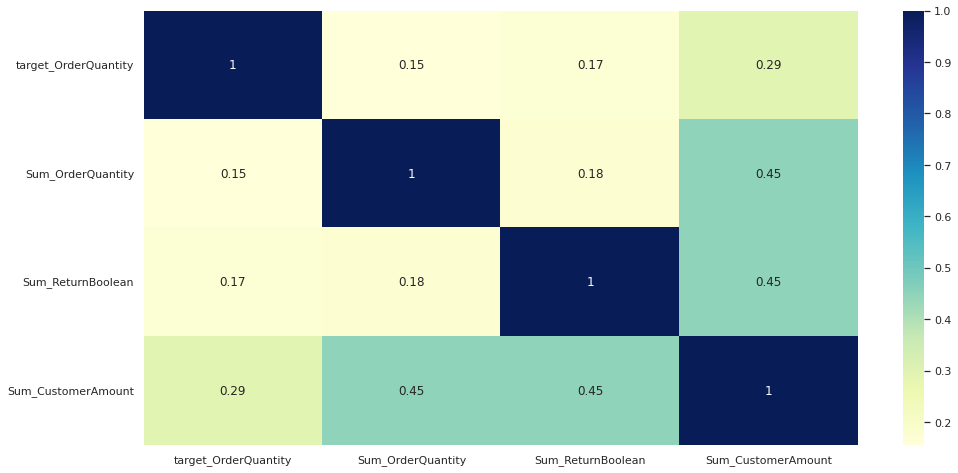

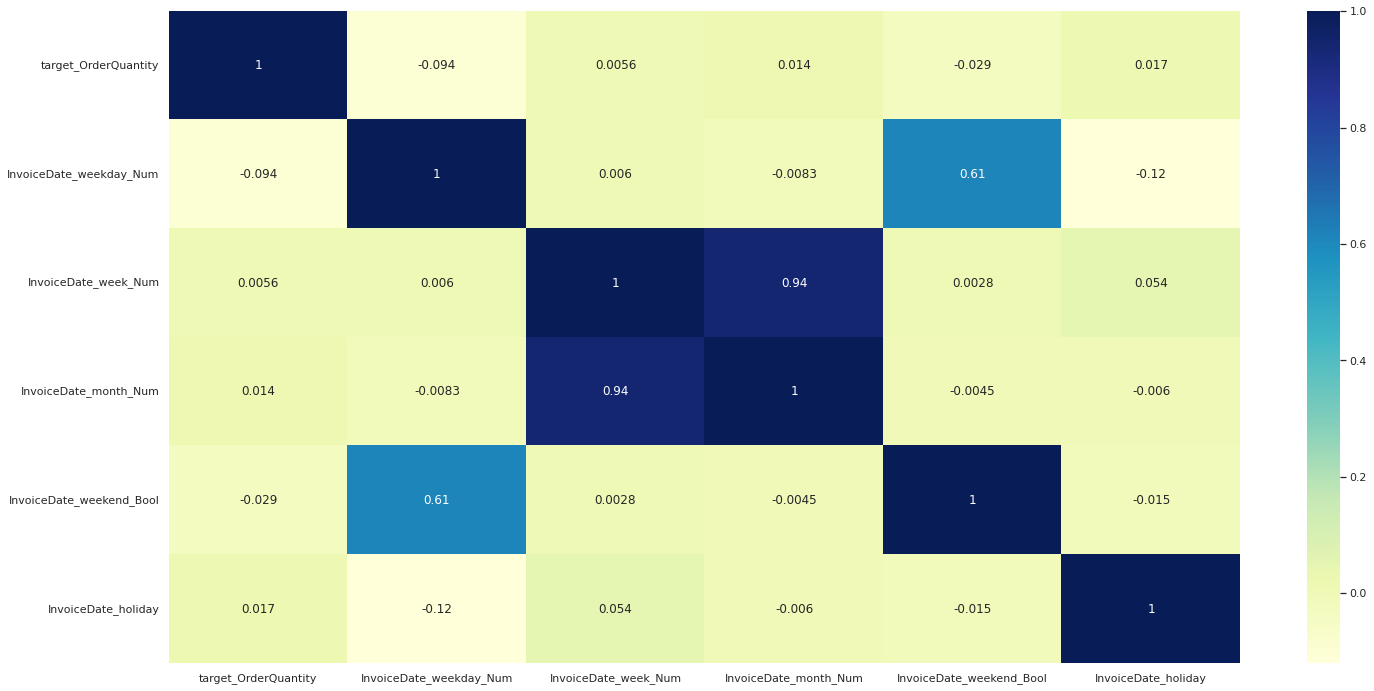

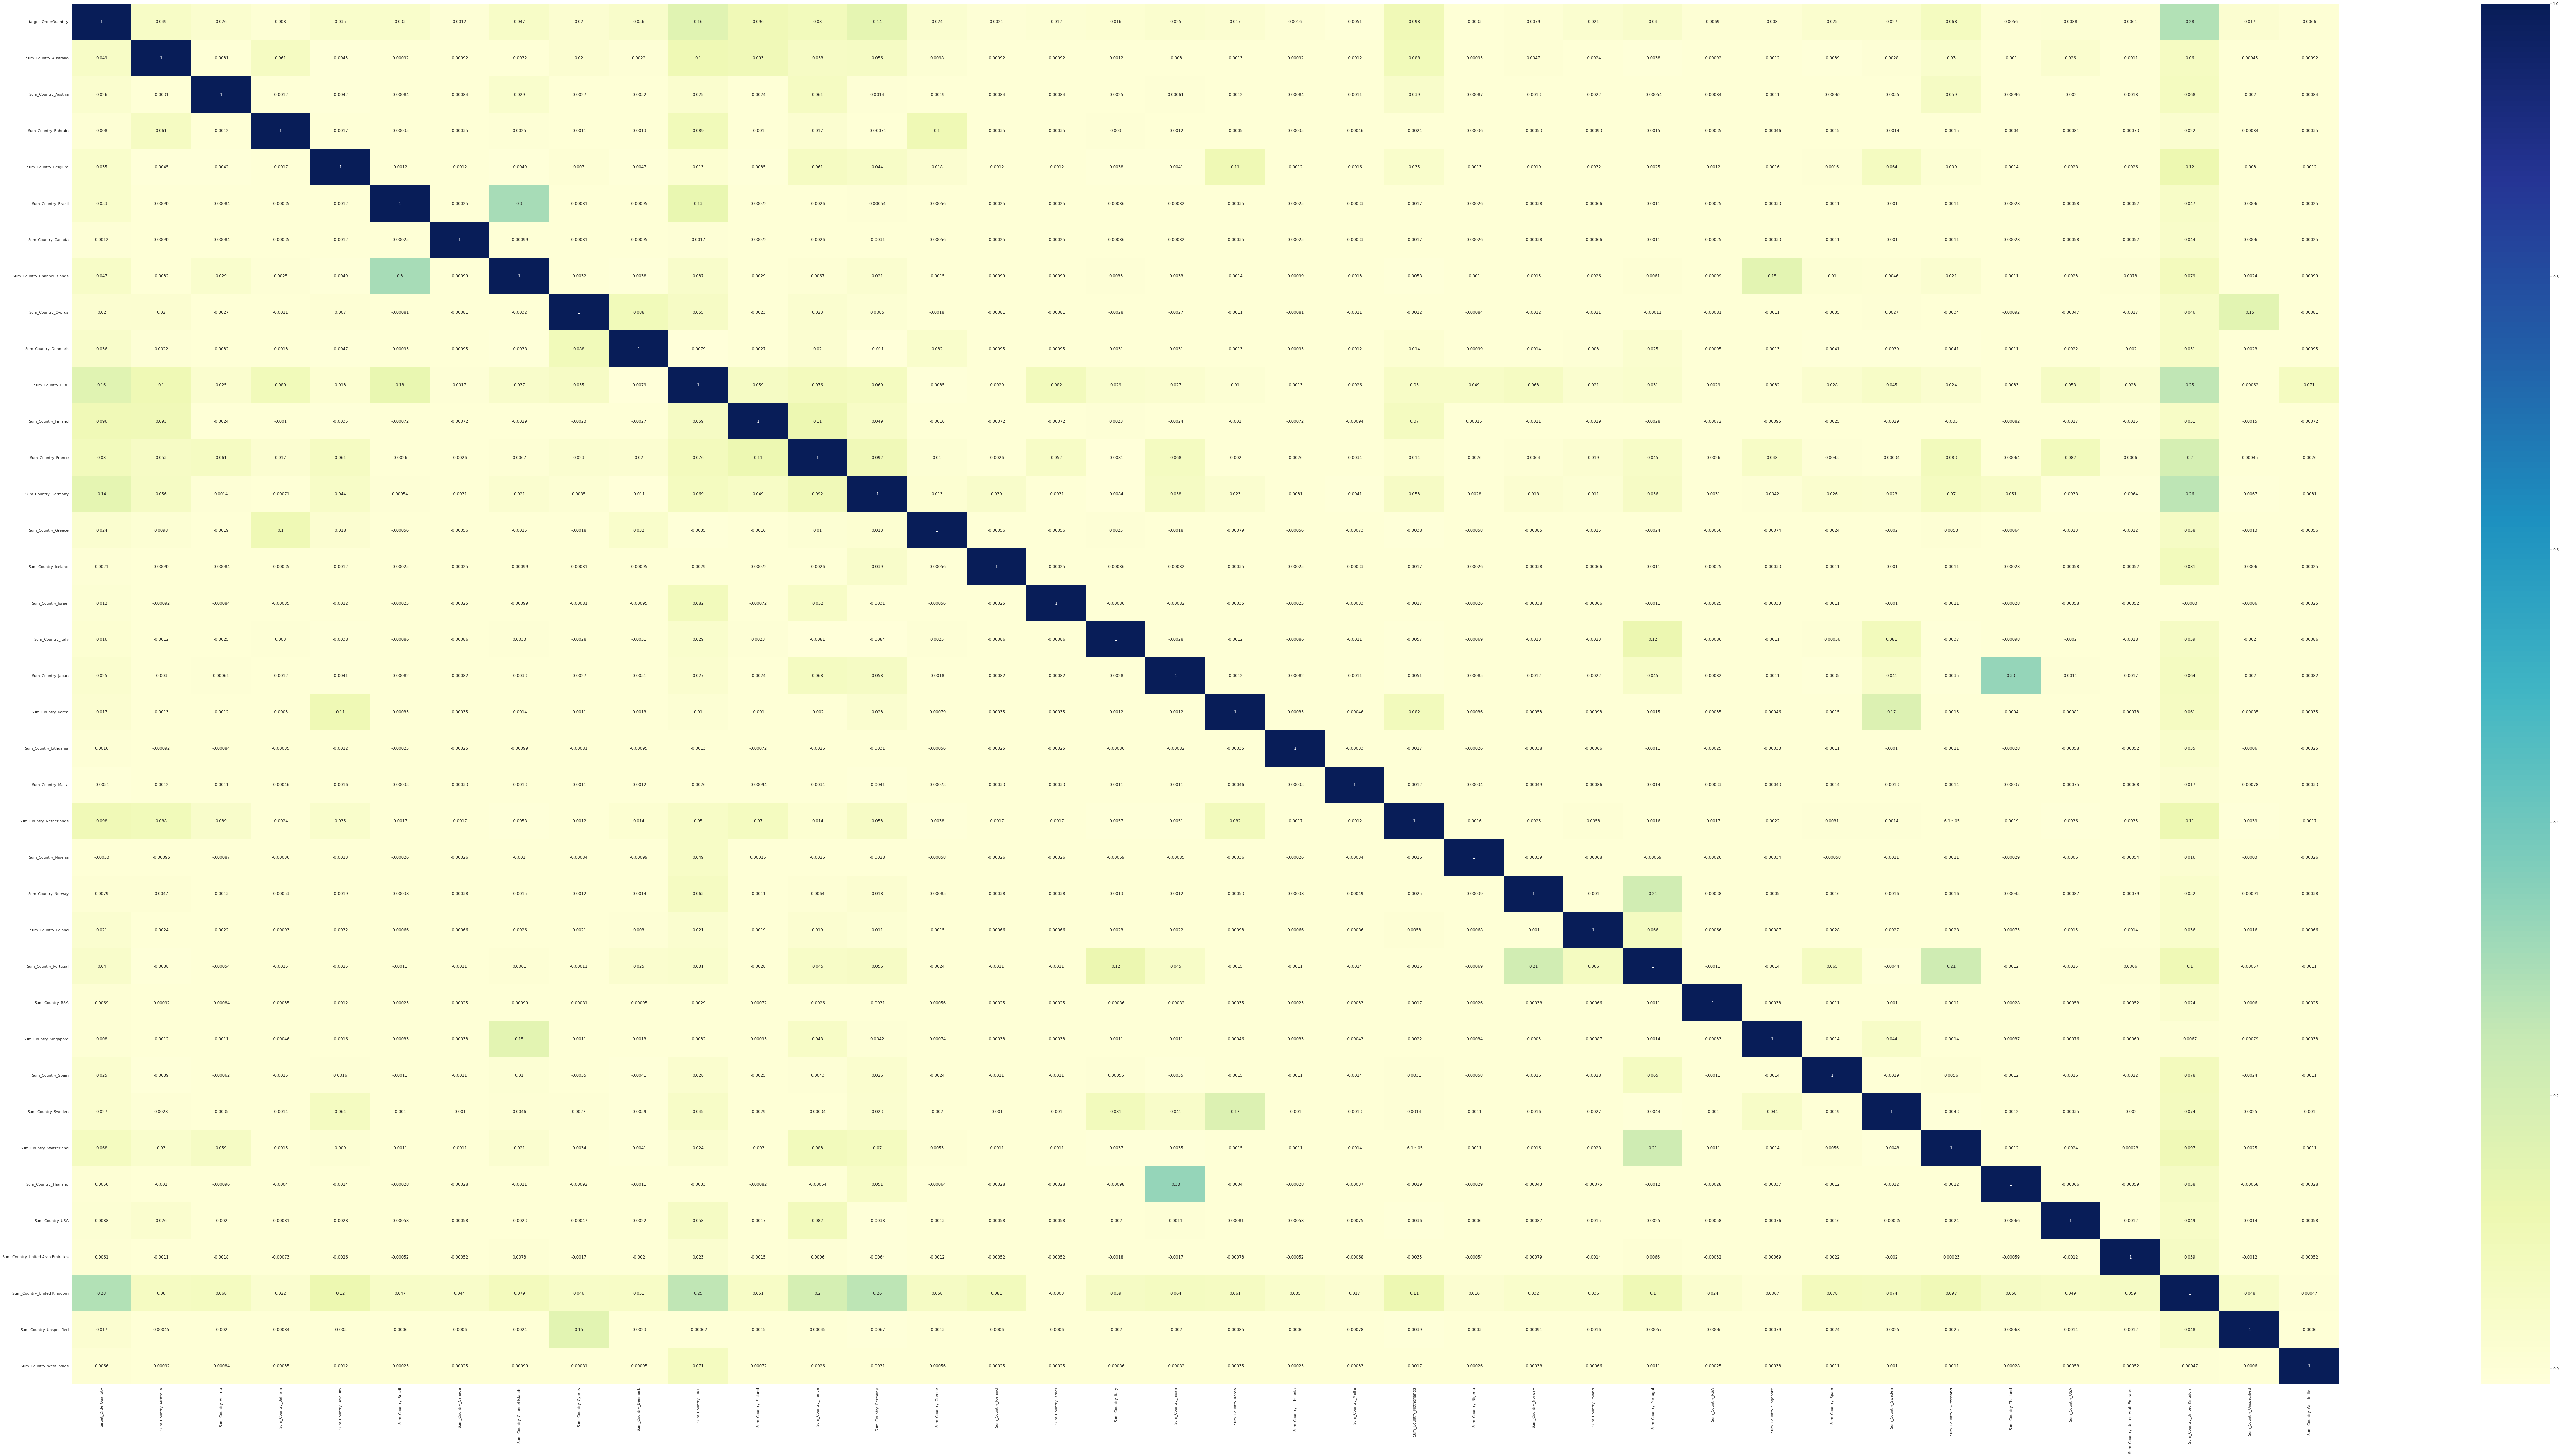

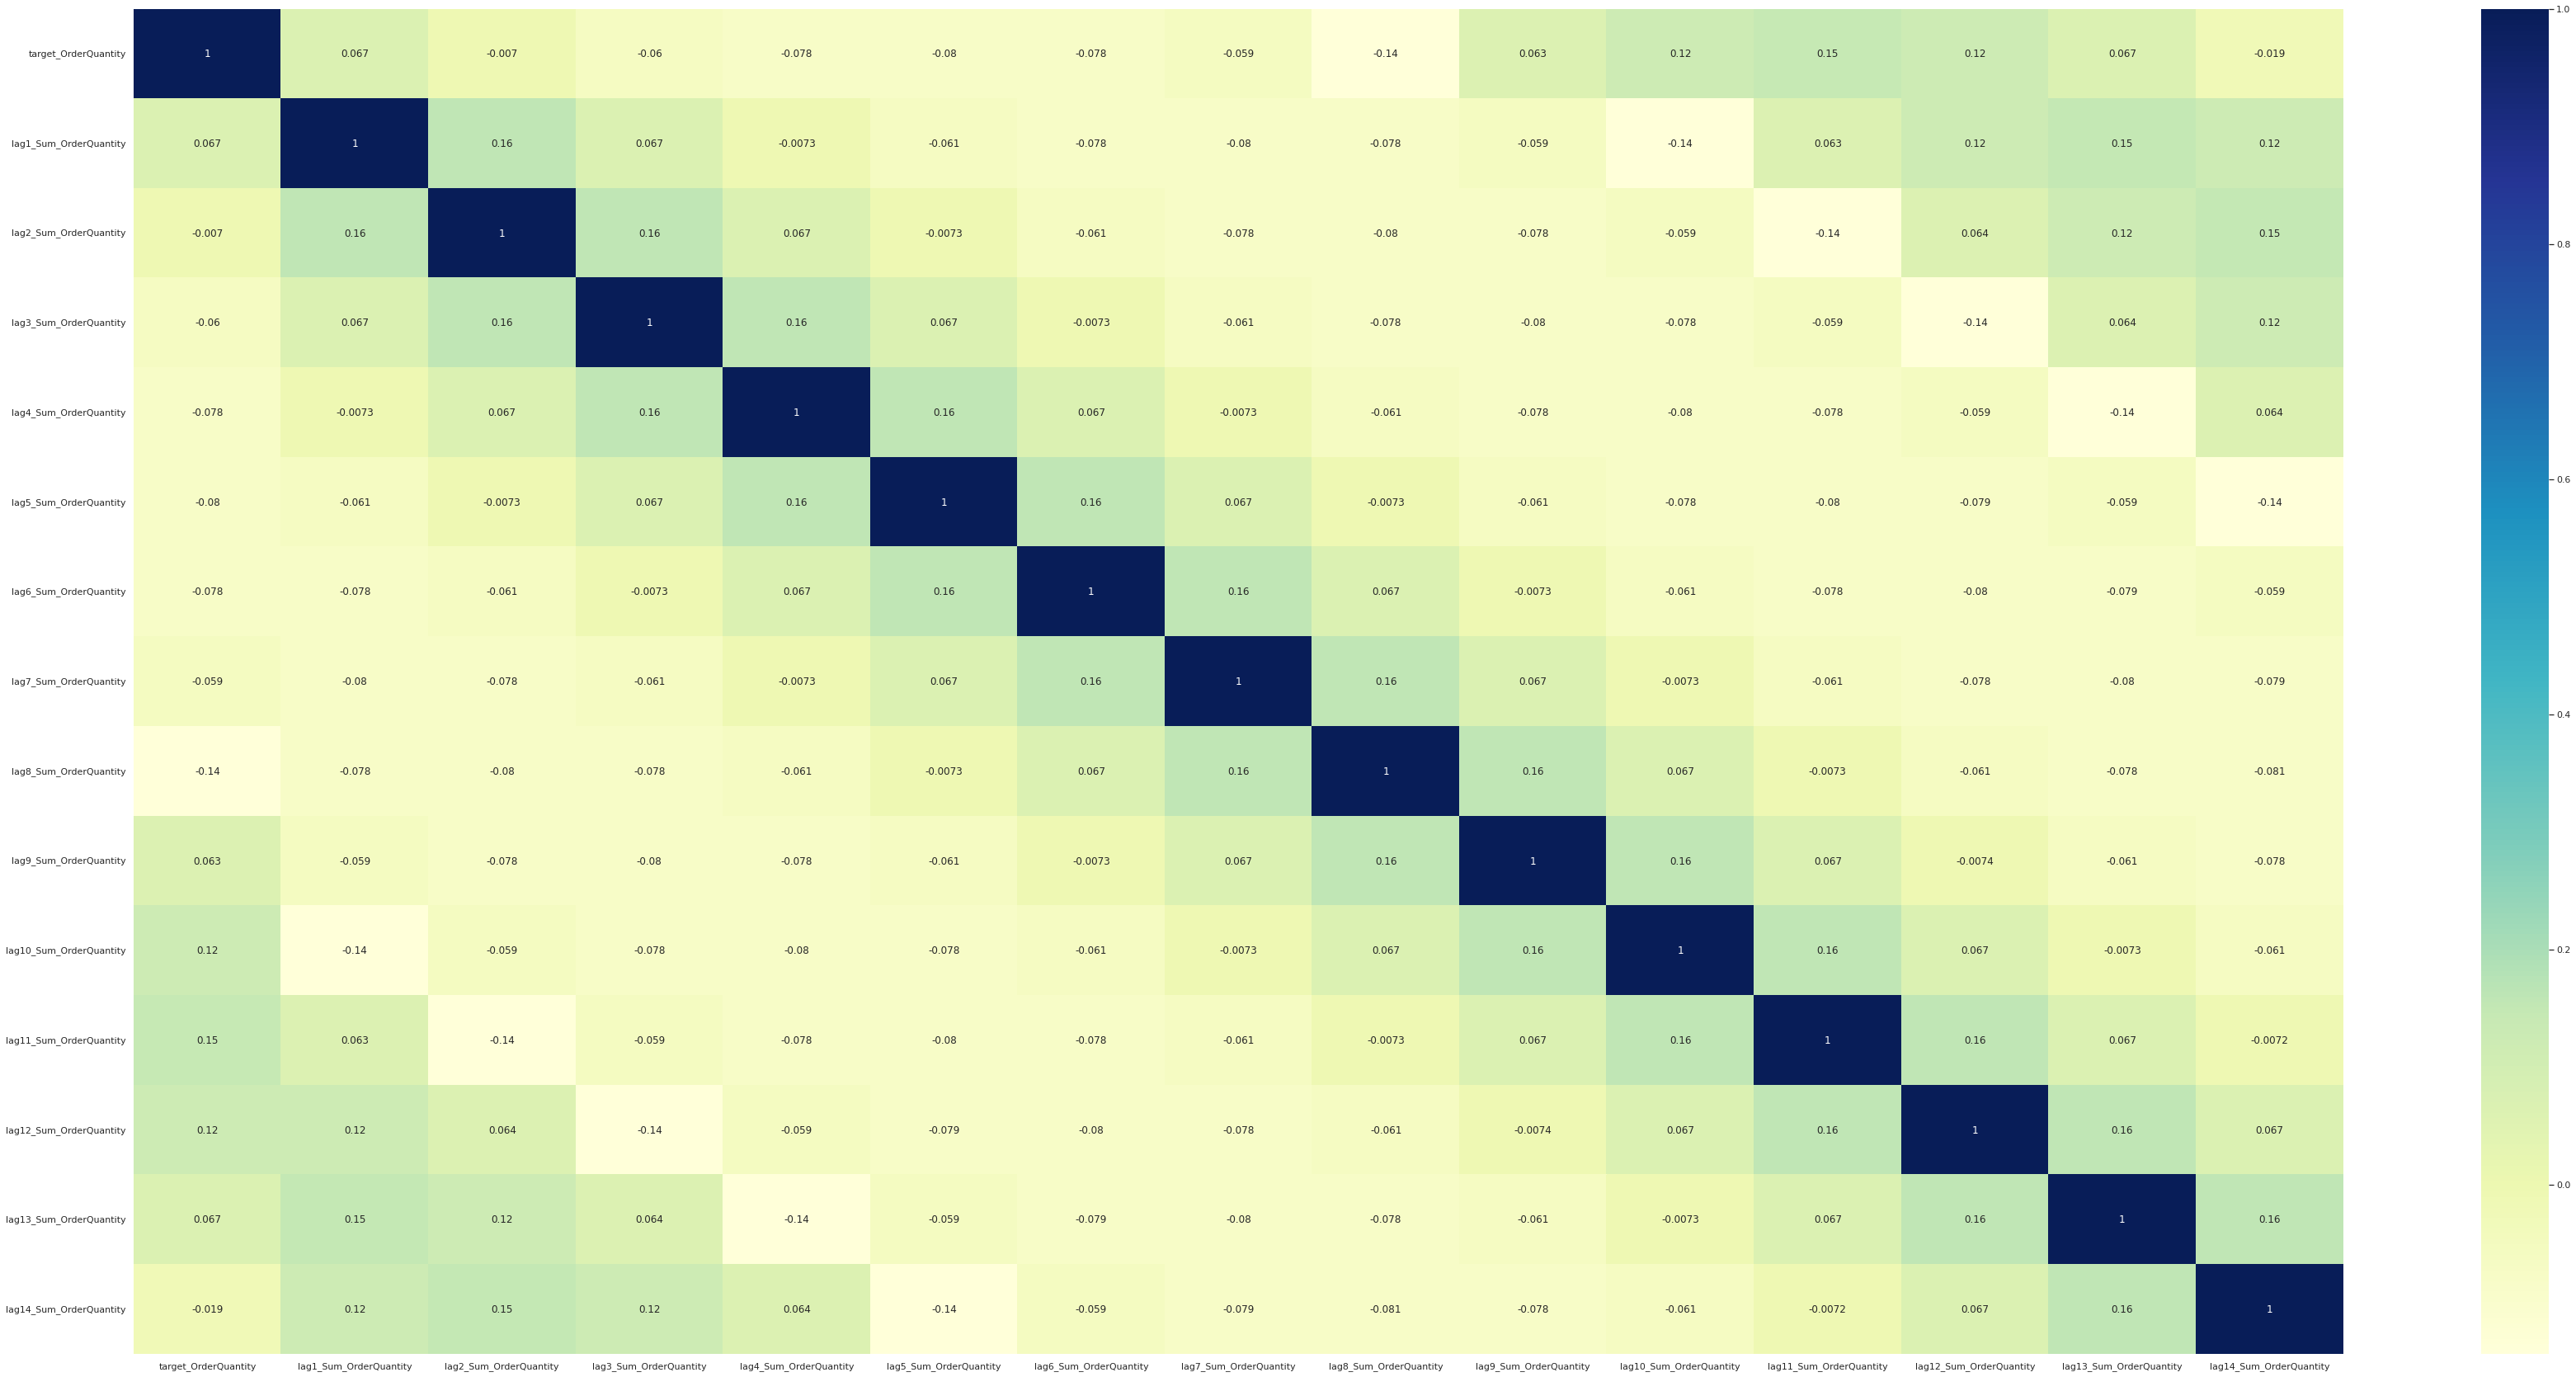

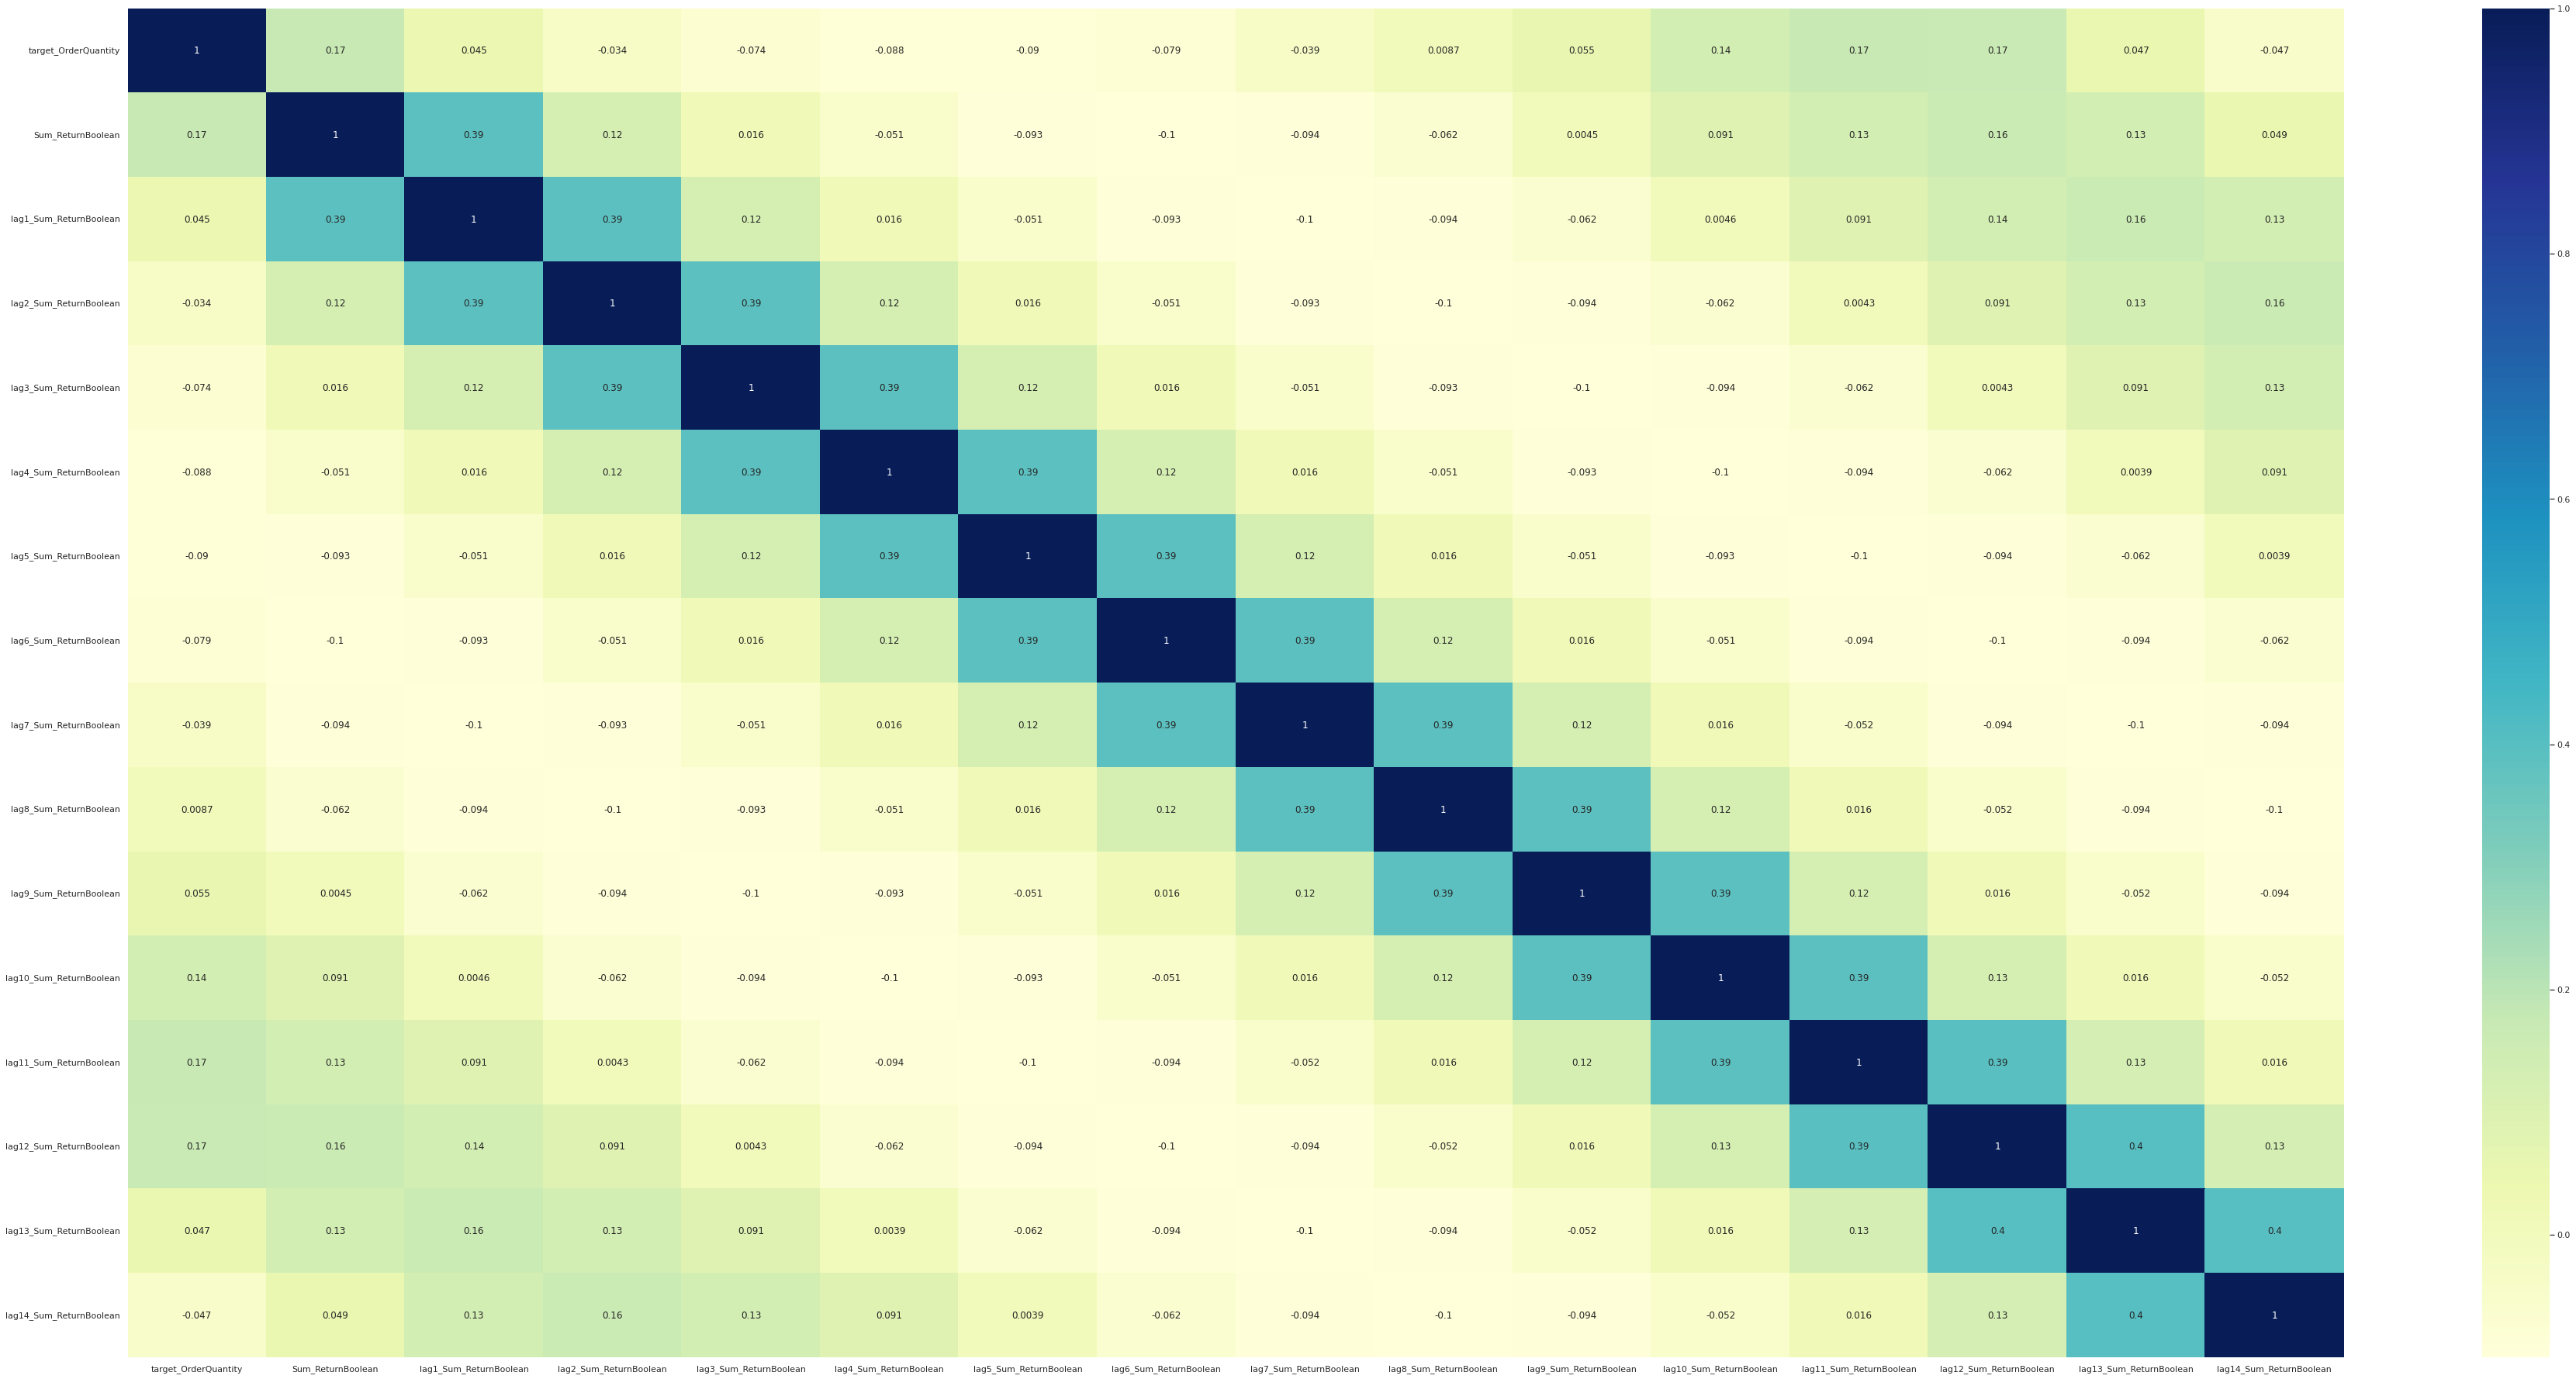

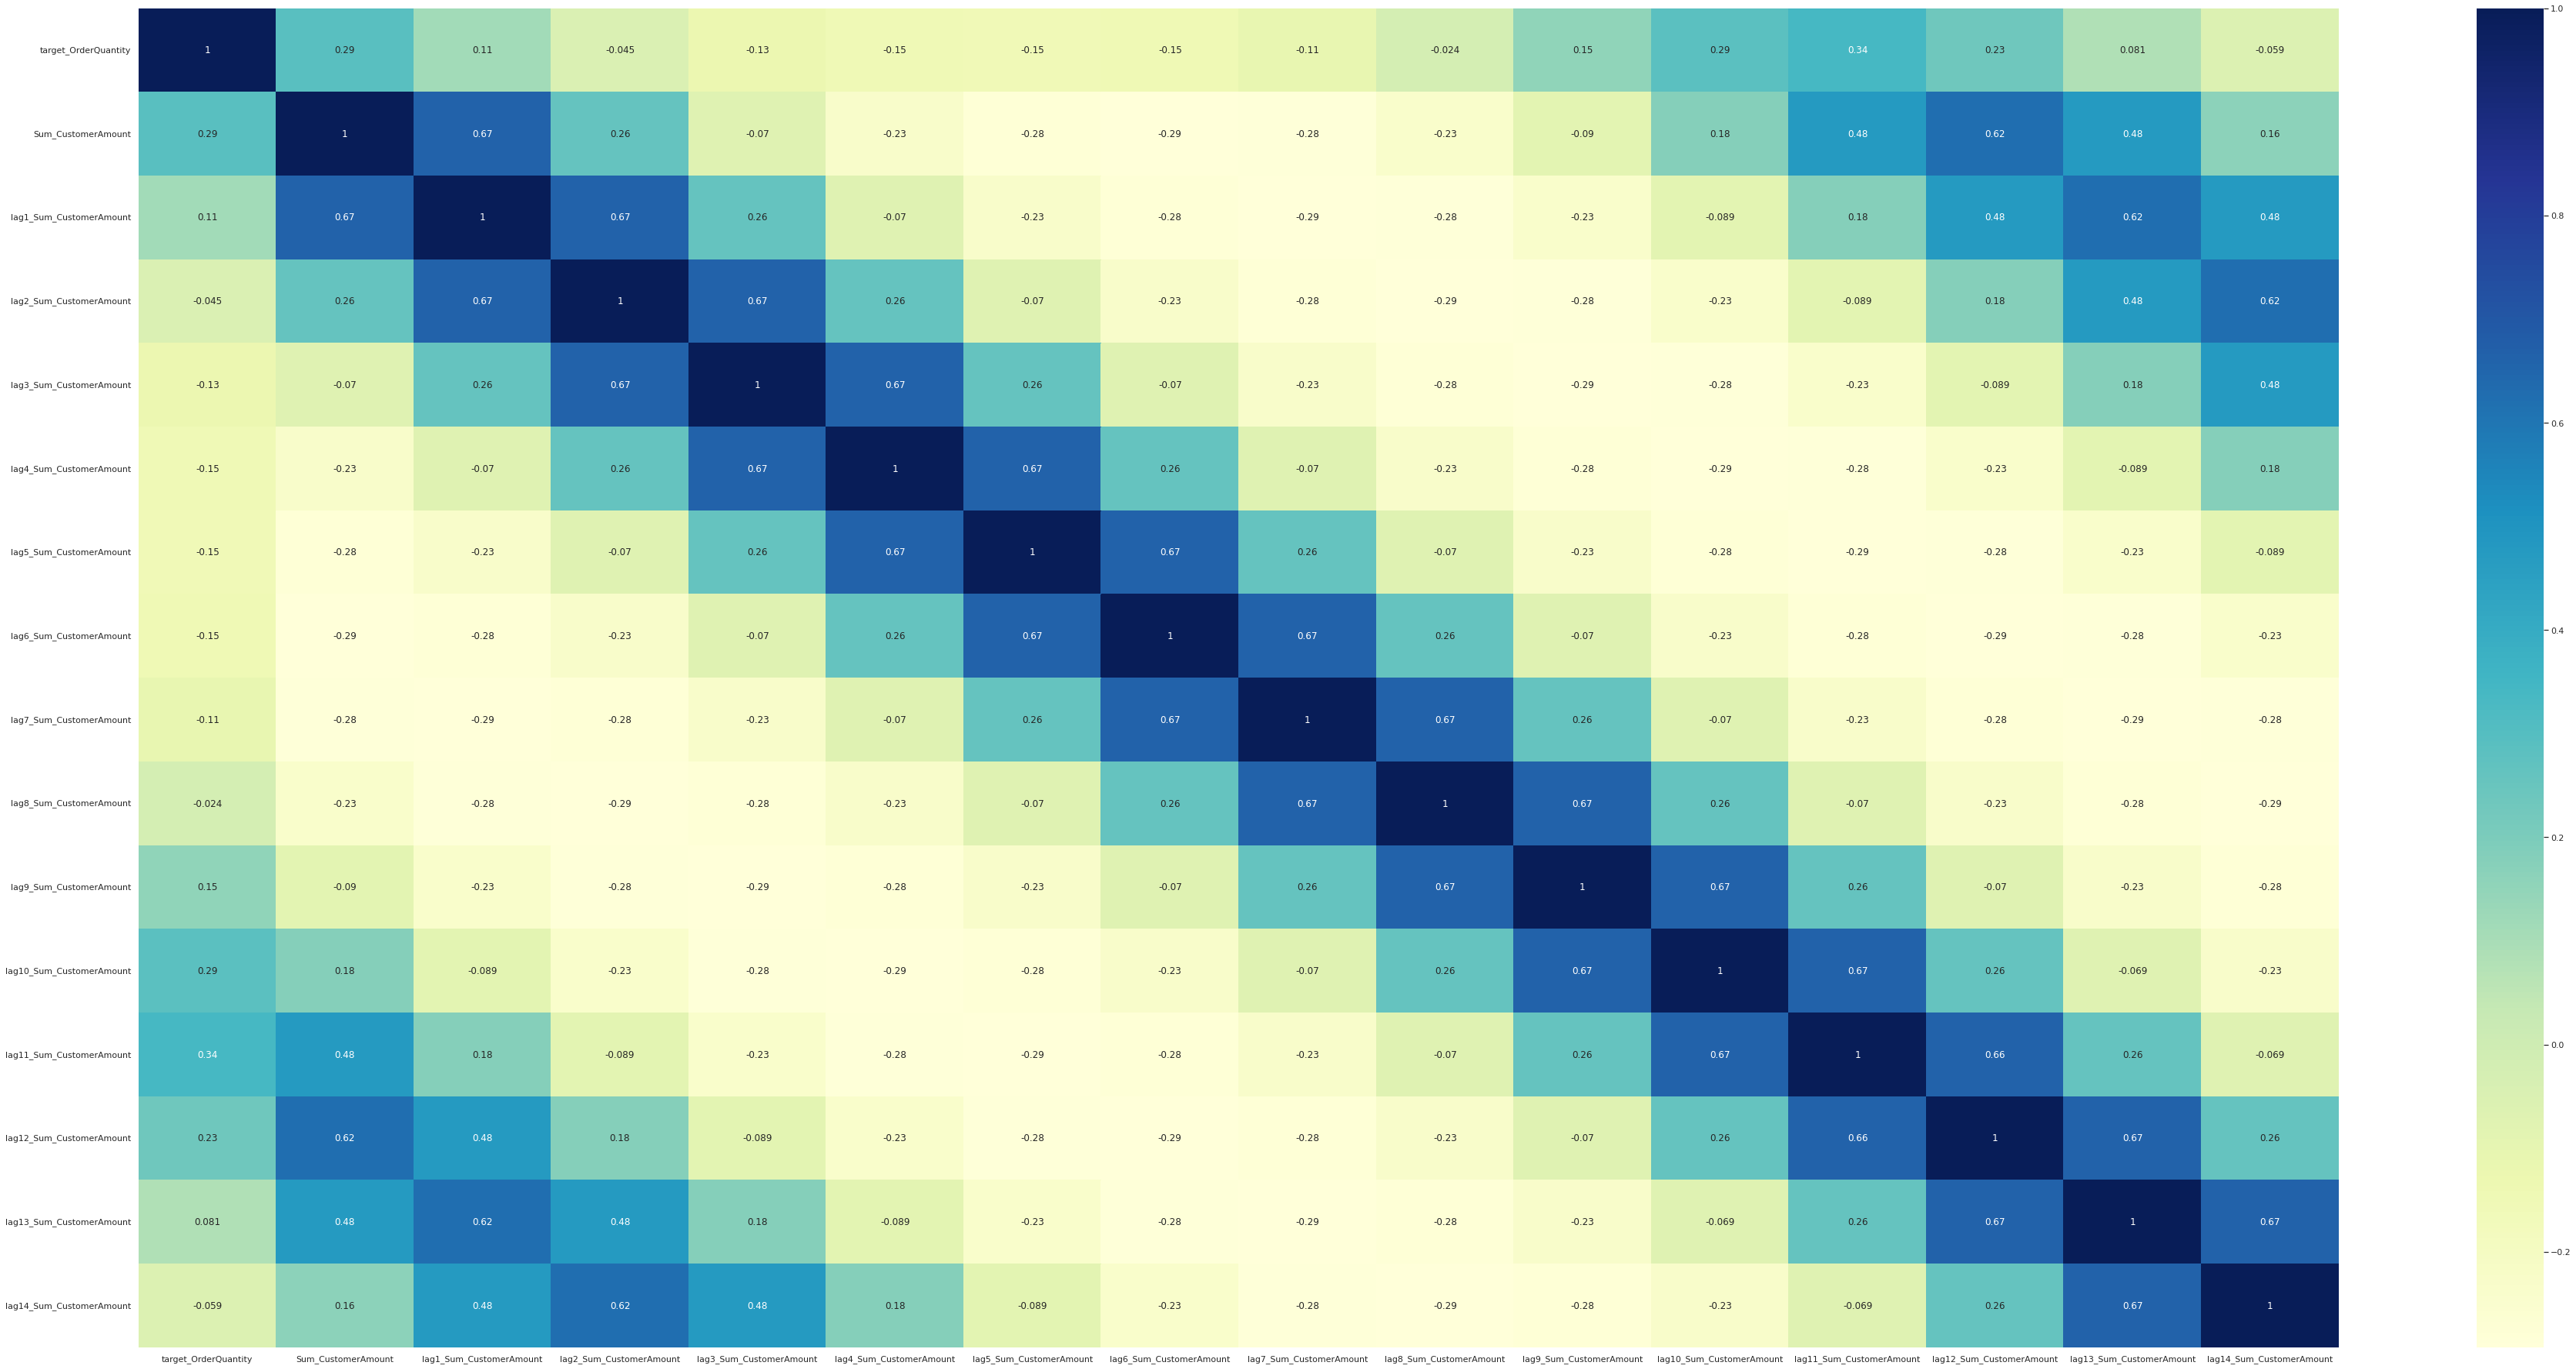

In [51]:
for i, column_grouping in enumerate(correlation_column_grouping):
  df_corr1 = df[column_grouping]

  sns.set(rc = {'figure.figsize':(4*len(column_grouping),2*len(column_grouping))})
  h = sns.heatmap(df_corr1.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')
  plt.show()
  plt.close()

In [52]:
# df_corr1 = df[['target_OrderQuantity', 'Sum_ReturnBoolean',
#        'Sum_CustomerAmount', 'Sum_InvoiceAmount', 'Mean_ReturnBoolean']]

# sns.set(rc = {'figure.figsize':(16,8)})
# sns.heatmap(df_corr1.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


In [53]:
# df_corr1 = df[['Mean_OrderQuantity', 'Mean_ReturnBoolean',
#        'Mean_CustomerAmount', 'Mean_InvoiceAmount', 'Mean_ReturnBoolean']]

# sns.set(rc = {'figure.figsize':(16,8)})
# sns.heatmap(df_corr1.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


In [54]:
plt.rcParams["figure.figsize"] = (20,5)

## FFT

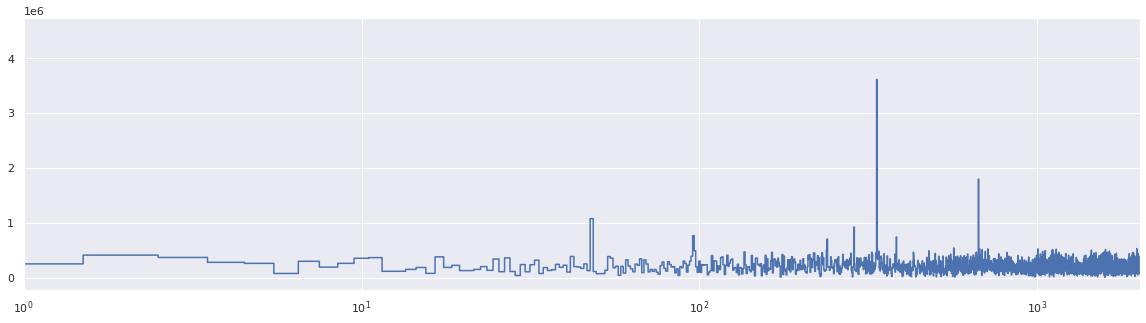

In [55]:
fft = abs(tf.signal.rfft(target_series))
sfft = np.array(sorted(fft, reverse=True))
frequencies = np.arange(0, len(fft))

plt.step(frequencies, fft, where='mid')
plt.xlim(1, len(fft))
plt.xscale('log')

# _ = plt.xticks([34, 68], labels=['1/24h', '1/12h'])

## Correlation

Remove outliers

https://www.askpython.com/python/examples/detection-removal-outliers-in-python

In [56]:
df_corr1 = df[correlation_column_grouping[0]]

q75,q25 = np.percentile(df_corr1['target_OrderQuantity'],[75,25])
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)


print(len(df_corr1))
df_corr1 = df_corr1[df_corr1['target_OrderQuantity'] > min] 
df_corr1 = df_corr1[df_corr1['target_OrderQuantity'] < max]
len(df_corr1)

4019


3520

https://plotly.com/python/plotly-express/

In [57]:
px.scatter_matrix( df_corr1, dimensions= correlation_column_grouping[0] ,  color="target_OrderQuantity")


4019


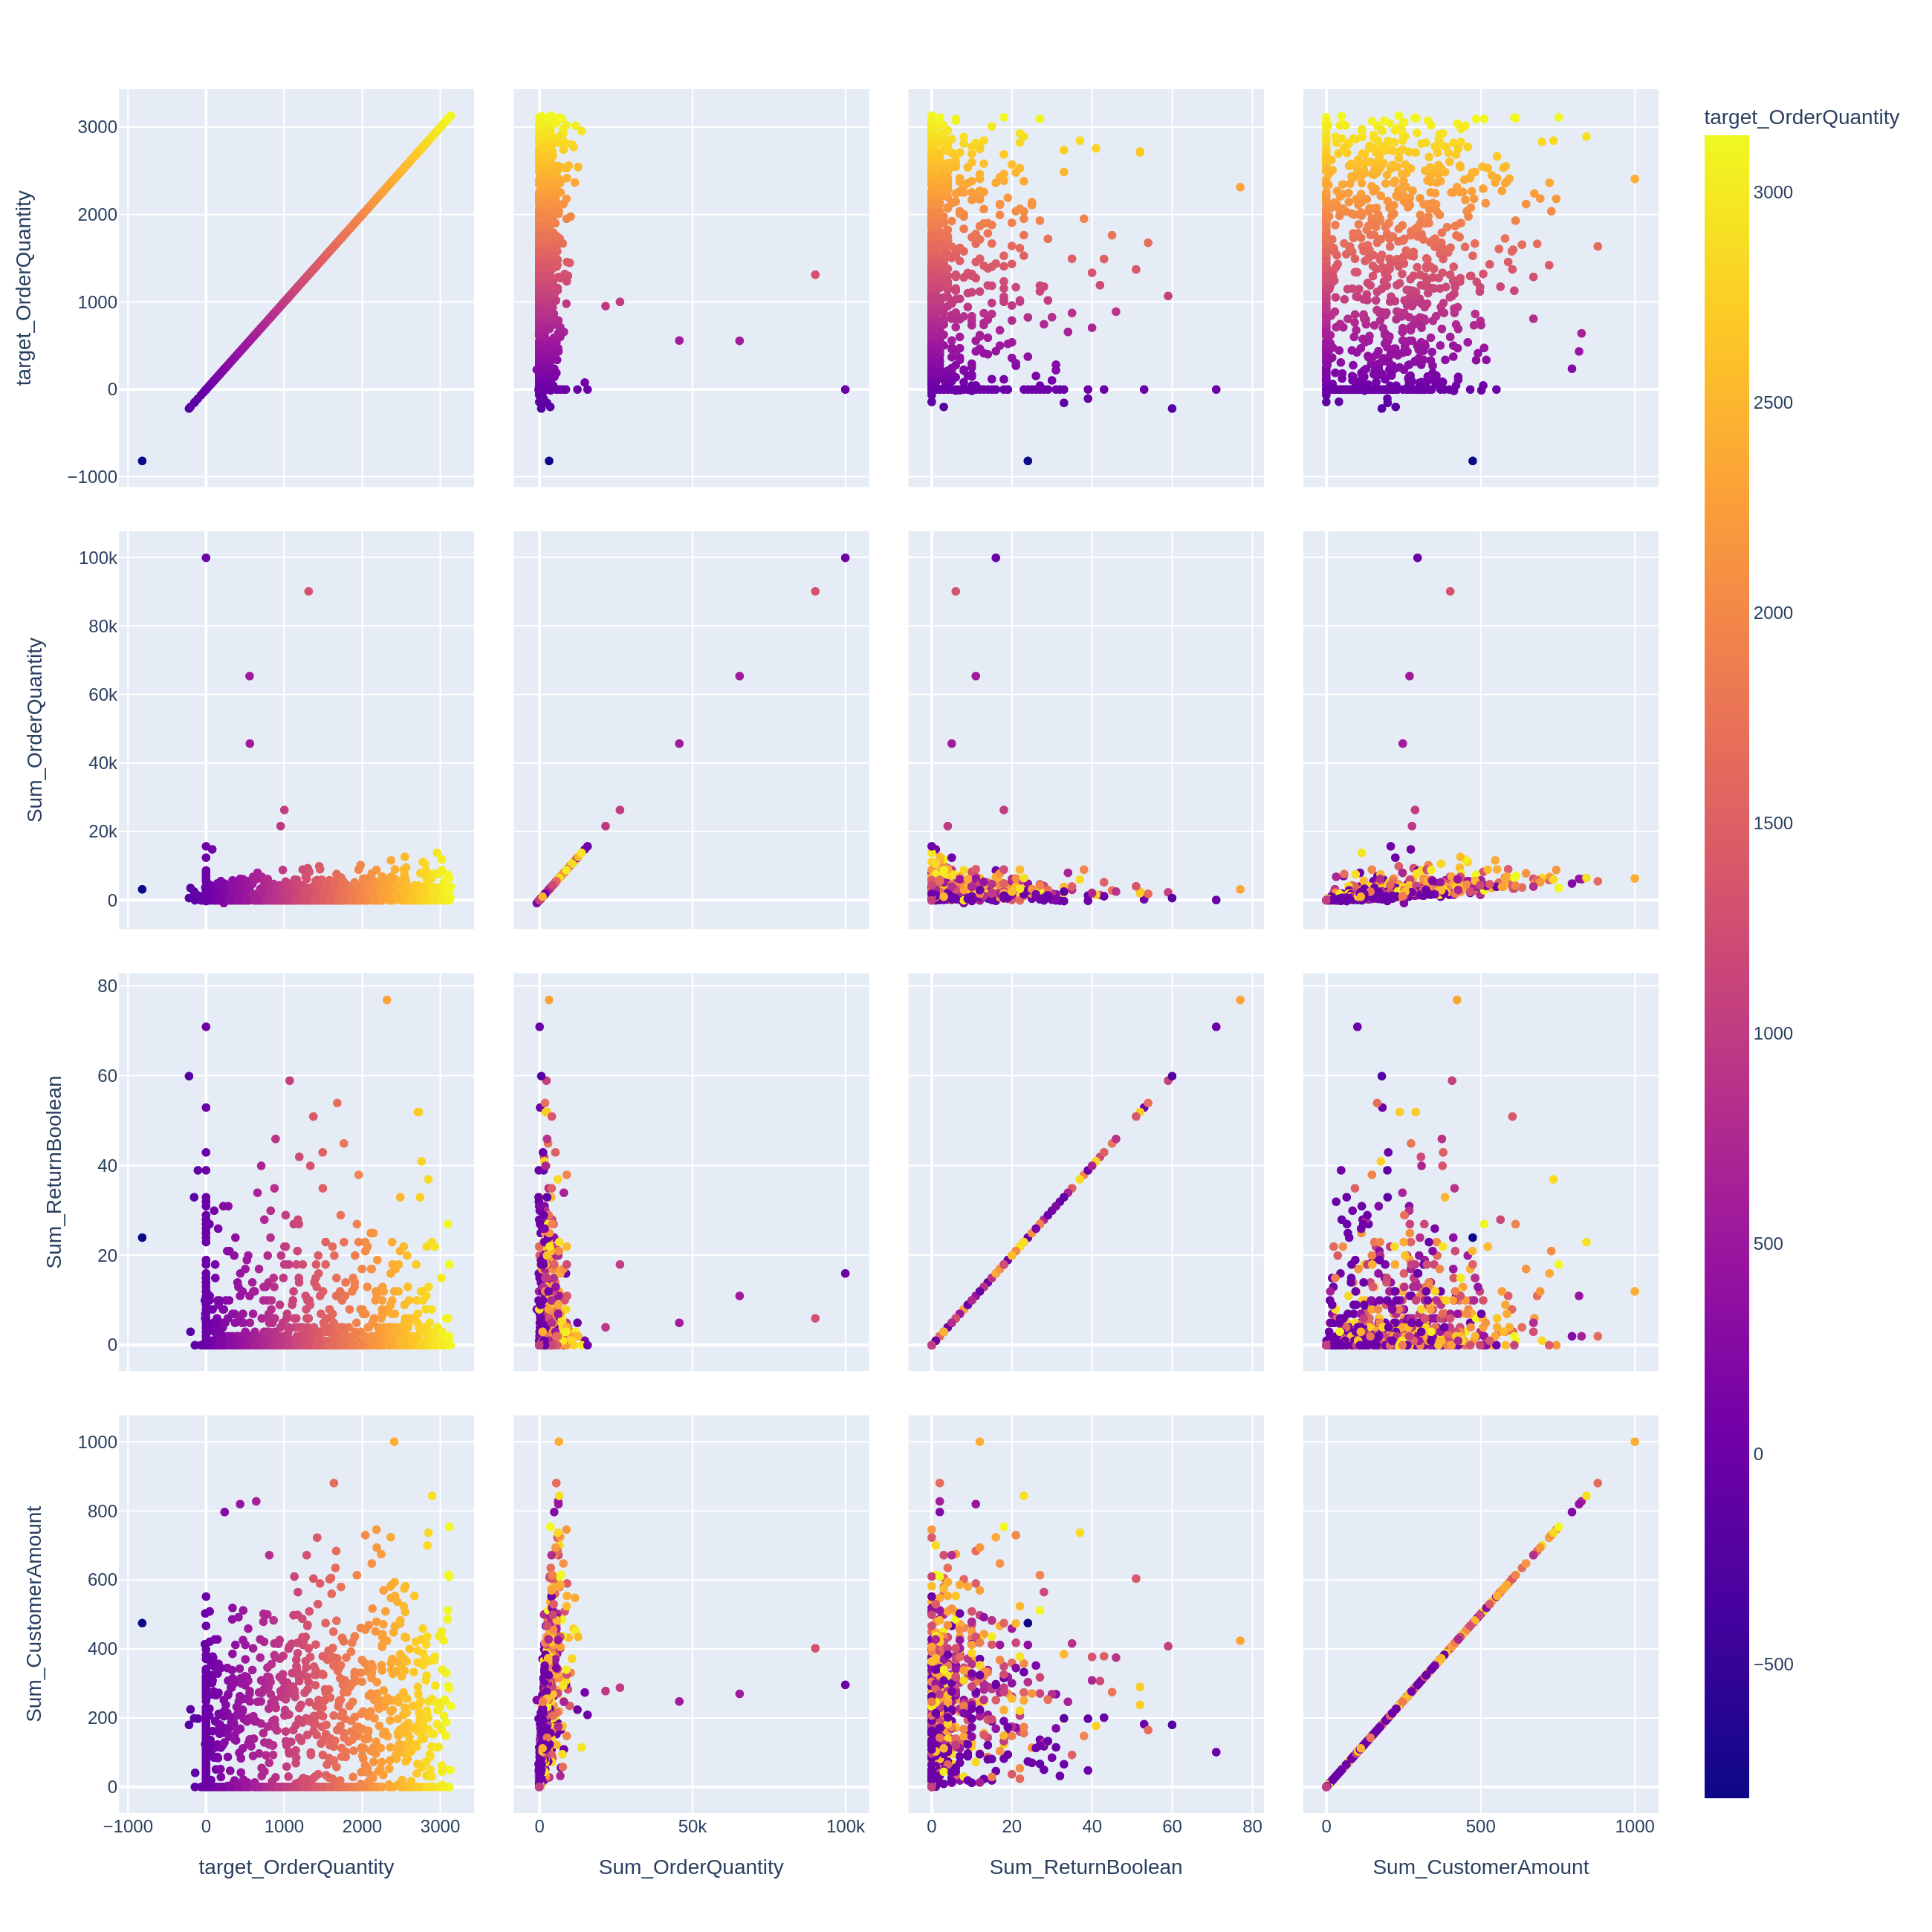

4019


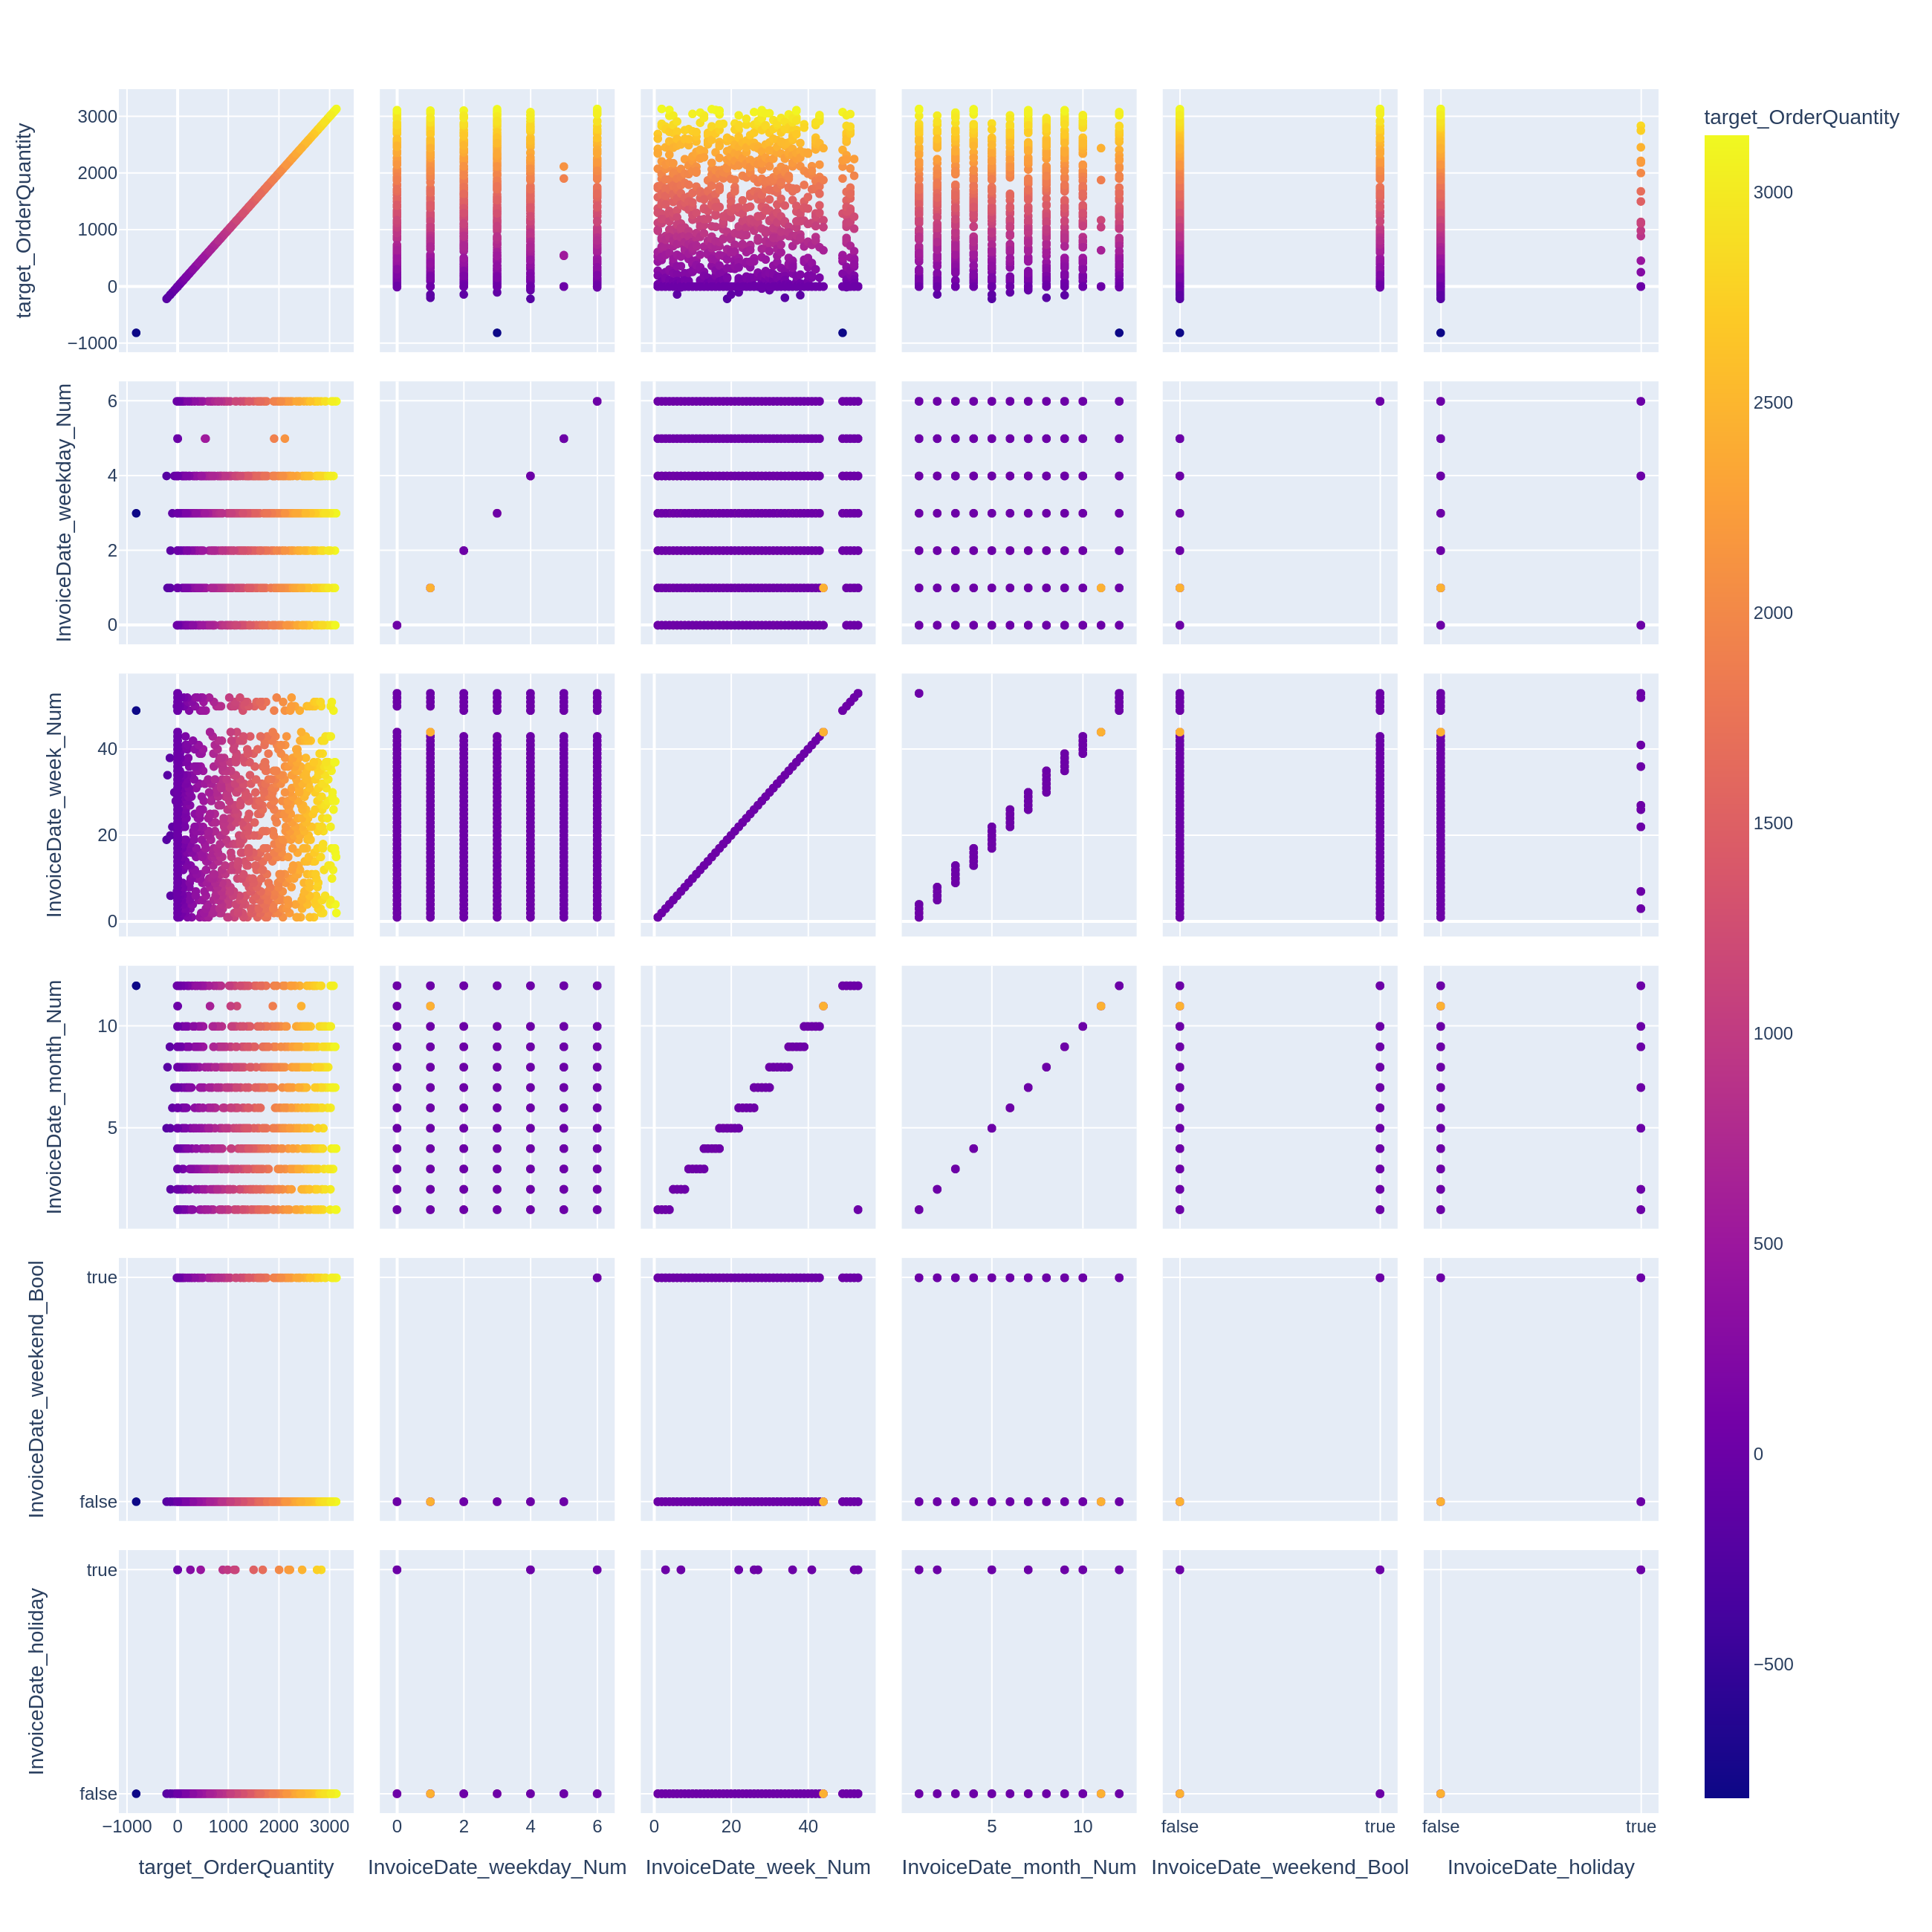

In [58]:
correlation_column_grouping_show = correlation_column_grouping[:2]


for i, column_grouping in enumerate(correlation_column_grouping_show):
  df_corr1 = df[column_grouping]

  # Remove outliers
  q75,q25 = np.percentile(df_corr1['target_OrderQuantity'],[75,25])
  intr_qr = q75-q25

  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)


  print(len(df_corr1))
  df_corr1 = df_corr1[df_corr1['target_OrderQuantity'] > min] 
  df_corr1 = df_corr1[df_corr1['target_OrderQuantity'] < max]
  len(df_corr1)

  showPlotlyAsImage(px.scatter_matrix( df_corr1, dimensions= column_grouping ,  color="target_OrderQuantity"), height = 1300, width=1300)


In [59]:
# is not nice to plot that many correlatinos

# correlation_column_grouping_show = correlation_column_grouping[3:]


# for i, column_grouping in enumerate(correlation_column_grouping_show):
#   df_corr1 = df[column_grouping]

#   # Remove outliers
#   q75,q25 = np.percentile(df_corr1['target_OrderQuantity'],[75,25])
#   intr_qr = q75-q25

#   max = q75+(1.5*intr_qr)
#   min = q25-(1.5*intr_qr)


#   print(len(df_corr1))
#   df_corr1 = df_corr1[df_corr1['target_OrderQuantity'] > min] 
#   df_corr1 = df_corr1[df_corr1['target_OrderQuantity'] < max]
#   len(df_corr1)

#   showPlotlyAsImage(px.scatter_matrix( df_corr1, dimensions= column_grouping ,  color="target_OrderQuantity"), height = 2500, width=2500)
